In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
df = pd.read_csv("../data/dataset1.csv")

In [3]:
df

,ID,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,...,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration,Mode
0,5.583410e+10,2018,January,Saturday,male,42,8,1,1,0,...,never,never,daily,shopping/grocery,Groningen,Groningen,60,10.30,15,car
1,5.583410e+10,2018,January,Saturday,male,42,8,1,1,0,...,never,never,daily,shopping/grocery,Groningen,Groningen,60,11.15,10,car
2,5.583410e+10,2018,January,Saturday,male,42,8,1,1,0,...,never,never,daily,visit,Groningen,Groningen,10,15.55,5,bicycle
3,5.583410e+10,2018,January,Saturday,male,42,8,1,1,0,...,never,never,daily,visit,Groningen,Groningen,10,18.30,5,bicycle
4,5.583410e+10,2018,January,Friday,male,42,3,1,1,0,...,never,few times a year,daily,shopping/grocery,Groningen,Groningen,30,9.00,10,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649515,3.100000e+11,2022,December,Thursday,female,49,7,1,1,0,...,never,few times a year,few times a week,education/course,North Holland,North Holland,110,15.56,35,car
649516,3.100000e+11,2022,December,Thursday,female,49,7,1,1,0,...,never,few times a year,few times a week,shopping/grocery,North Holland,North Holland,11,16.50,7,on foot
649517,3.100000e+11,2022,December,Thursday,female,49,7,1,1,0,...,never,few times a year,few times a week,shopping/grocery,North Holland,North Holland,6,17.15,5,on foot
649518,3.100000e+11,2022,December,Thursday,female,49,7,1,1,0,...,never,few times a year,few times a week,sports,North Holland,North Holland,63,18.20,15,car


In [4]:
drop_col = ["ID"]
df = df.drop(drop_col, axis=1)
df

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration,Mode
0,2018,January,Saturday,male,42,8,1,1,0,no,never,never,daily,shopping/grocery,Groningen,Groningen,60,10.30,15,car
1,2018,January,Saturday,male,42,8,1,1,0,no,never,never,daily,shopping/grocery,Groningen,Groningen,60,11.15,10,car
2,2018,January,Saturday,male,42,8,1,1,0,no,never,never,daily,visit,Groningen,Groningen,10,15.55,5,bicycle
3,2018,January,Saturday,male,42,8,1,1,0,no,never,never,daily,visit,Groningen,Groningen,10,18.30,5,bicycle
4,2018,January,Friday,male,42,3,1,1,0,no,never,few times a year,daily,shopping/grocery,Groningen,Groningen,30,9.00,10,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649515,2022,December,Thursday,female,49,7,1,1,0,no,never,few times a year,few times a week,education/course,North Holland,North Holland,110,15.56,35,car
649516,2022,December,Thursday,female,49,7,1,1,0,no,never,few times a year,few times a week,shopping/grocery,North Holland,North Holland,11,16.50,7,on foot
649517,2022,December,Thursday,female,49,7,1,1,0,no,never,few times a year,few times a week,shopping/grocery,North Holland,North Holland,6,17.15,5,on foot
649518,2022,December,Thursday,female,49,7,1,1,0,no,never,few times a year,few times a week,sports,North Holland,North Holland,63,18.20,15,car


In [5]:
print(df.columns)

Index(['Year', 'Month', 'Weekday', 'Gender', 'Age', 'Household_income',
       'Licences_in_house', 'Cars_in_house', 'Mopeds_in_house', 'Elec_bike',
       'FqEFiets', 'FqBTM', 'FqAutoB', 'Motive', 'Departure_prov',
       'Arrival_prov', 'Distance', 'Depart_time', 'Duration', 'Mode'],
      dtype='object')


In [5]:
df.isnull().any()

Year                 False
Month                False
Weekday              False
Gender               False
Age                  False
Household_income     False
Licences_in_house    False
Cars_in_house        False
Mopeds_in_house      False
Elec_bike            False
FqEFiets             False
FqBTM                False
FqAutoB              False
Motive               False
Departure_prov       False
Arrival_prov         False
Distance             False
Depart_time          False
Duration             False
Mode                 False
dtype: bool

In [6]:
df.duplicated().sum()

4787

In [7]:
df.drop_duplicates(keep='first',inplace=True)
df

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration,Mode
0,2018,January,Saturday,male,42,8,1,1,0,no,never,never,daily,shopping/grocery,Groningen,Groningen,60,10.30,15,car
1,2018,January,Saturday,male,42,8,1,1,0,no,never,never,daily,shopping/grocery,Groningen,Groningen,60,11.15,10,car
2,2018,January,Saturday,male,42,8,1,1,0,no,never,never,daily,visit,Groningen,Groningen,10,15.55,5,bicycle
3,2018,January,Saturday,male,42,8,1,1,0,no,never,never,daily,visit,Groningen,Groningen,10,18.30,5,bicycle
4,2018,January,Friday,male,42,3,1,1,0,no,never,few times a year,daily,shopping/grocery,Groningen,Groningen,30,9.00,10,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649515,2022,December,Thursday,female,49,7,1,1,0,no,never,few times a year,few times a week,education/course,North Holland,North Holland,110,15.56,35,car
649516,2022,December,Thursday,female,49,7,1,1,0,no,never,few times a year,few times a week,shopping/grocery,North Holland,North Holland,11,16.50,7,on foot
649517,2022,December,Thursday,female,49,7,1,1,0,no,never,few times a year,few times a week,shopping/grocery,North Holland,North Holland,6,17.15,5,on foot
649518,2022,December,Thursday,female,49,7,1,1,0,no,never,few times a year,few times a week,sports,North Holland,North Holland,63,18.20,15,car


# EDA

In [8]:
df.describe()

,Year,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Distance,Depart_time,Duration
count,644733.000000,644733.000000,644733.000000,644733.000000,644733.00000,644733.000000,644733.000000,644733.000000,644733.000000
mean,2020.060107,48.025414,6.823905,1.820431,1.35272,0.045655,137.149304,13.770149,25.110495
std,1.435364,17.660979,2.662805,0.867280,0.91198,0.270041,250.843060,4.276748,31.958385
min,2018.000000,18.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,5.000000
25%,2019.000000,33.000000,5.000000,1.000000,1.00000,0.000000,18.000000,10.300000,10.000000
50%,2020.000000,48.000000,7.000000,2.000000,1.00000,0.000000,45.000000,14.000000,15.000000
75%,2021.000000,62.000000,9.000000,2.000000,2.00000,0.000000,140.000000,17.000000,30.000000
max,2022.000000,90.000000,10.000000,9.000000,9.00000,9.000000,6600.000000,23.900000,960.000000


<Axes: xlabel='Duration', ylabel='Distance'>

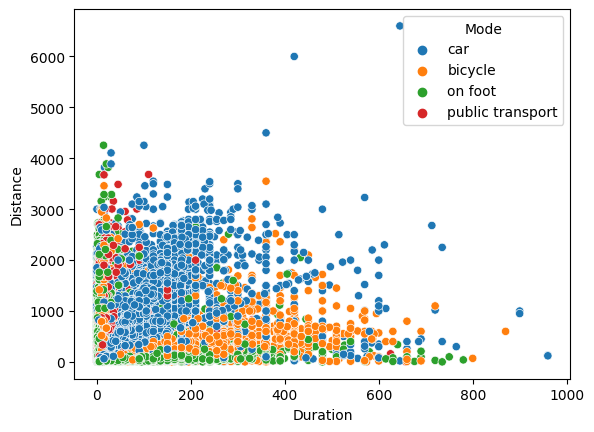

In [10]:
sns.scatterplot(x='Duration', y='Distance', hue="Mode", data=df)

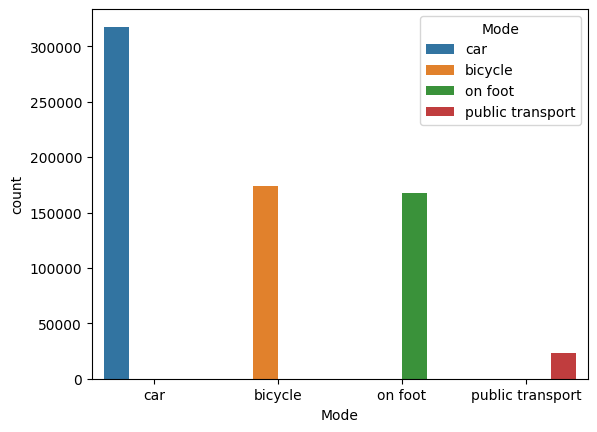

In [12]:
sns.countplot(x='Mode', data=df, hue="Mode")
plt.show()

In [9]:
perc=df['Mode'].value_counts(True)*100
print(perc)

car                 47.933641
bicycle             25.734529
on foot             22.888389
public transport     3.443441
Name: Mode, dtype: float64


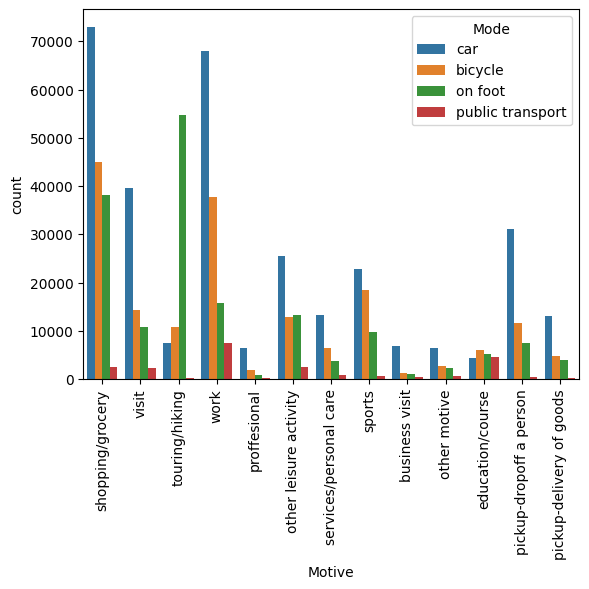

In [10]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

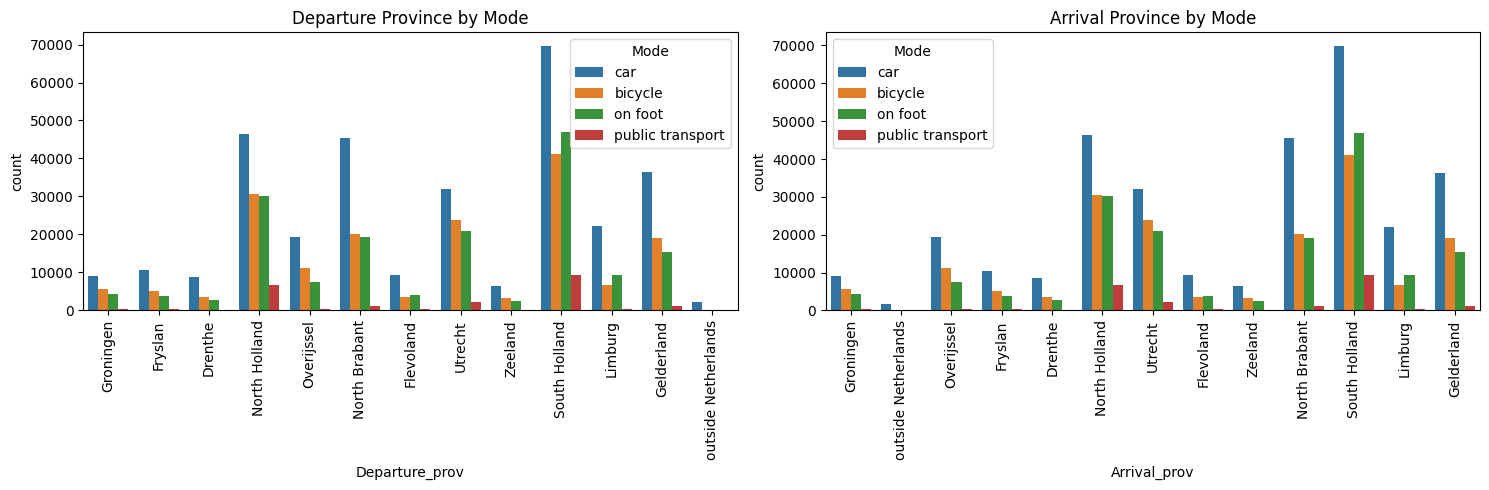

In [12]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Your countplot graphs
countplots = [
    (sns.countplot(x='Departure_prov', data=df, hue="Mode", ax=axes[0]), 'Departure Province by Mode'),
    (sns.countplot(x='Arrival_prov', data=df, hue="Mode", ax=axes[1]), 'Arrival Province by Mode'),
]

# Rotate X-axis labels for all countplots
for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

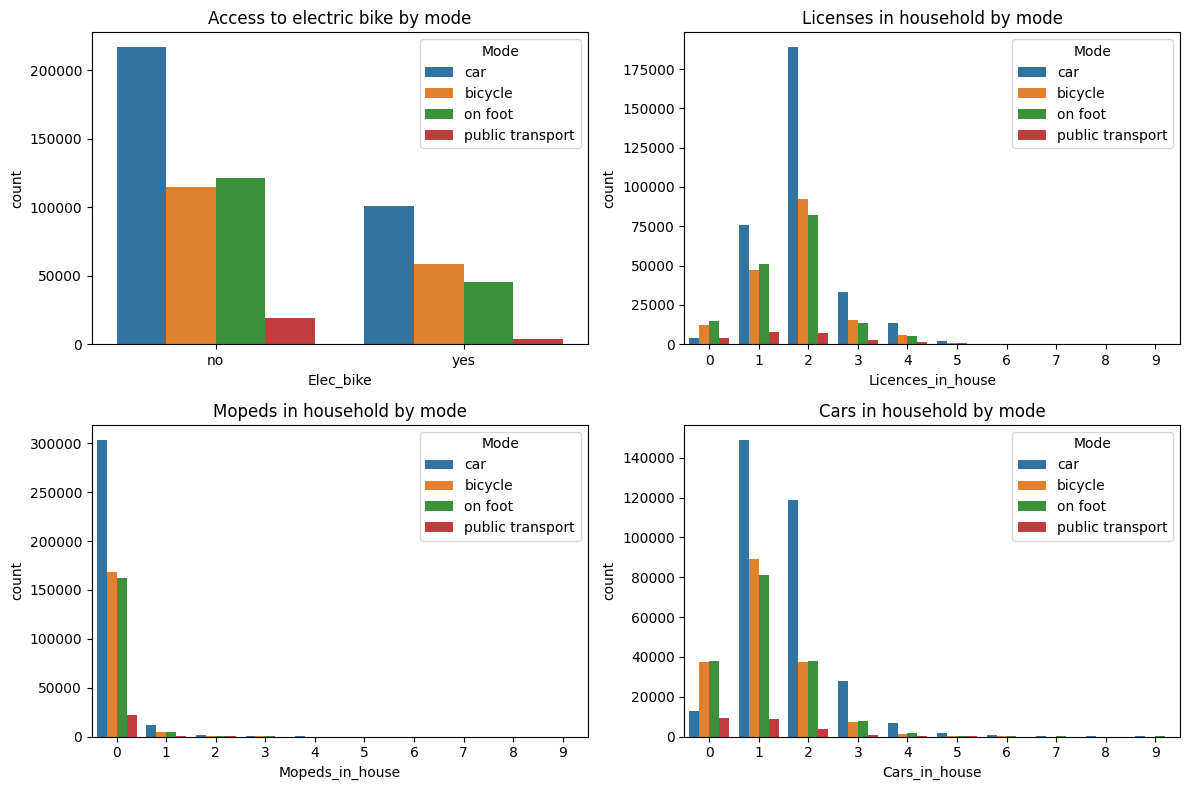

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Your countplot graphs
countplots = [
    (sns.countplot(x='Elec_bike', data=df, hue="Mode", ax=axes[0, 0]), 'Access to electric bike by mode'),
    (sns.countplot(x='Licences_in_house', data=df, hue="Mode", ax=axes[0, 1]), 'Licenses in household by mode'),
    (sns.countplot(x='Mopeds_in_house', data=df, hue="Mode", ax=axes[1, 0]), 'Mopeds in household by mode'),
    (sns.countplot(x='Cars_in_house', data=df, hue="Mode", ax=axes[1, 1]), 'Cars in household by mode')
]

# Rotate X-axis labels for all countplots
for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

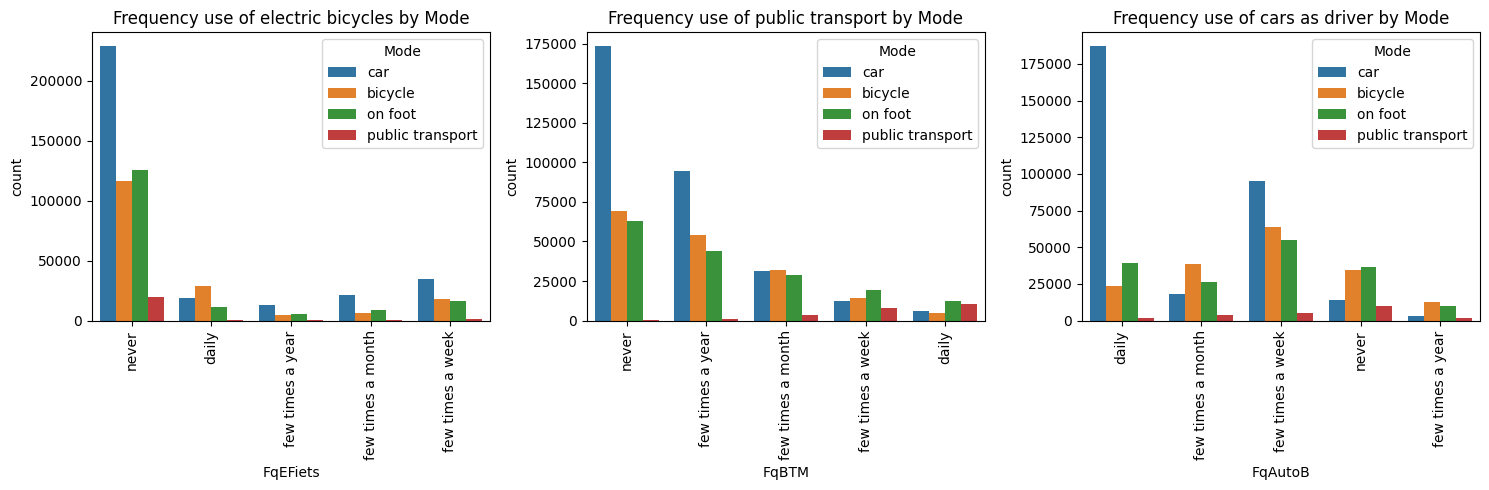

In [14]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Your countplot graphs
countplots = [
    (sns.countplot(x='FqEFiets', data=df, hue="Mode", ax=axes[0]), 'Frequency use of electric bicycles by Mode'),
    (sns.countplot(x='FqBTM', data=df, hue="Mode", ax=axes[1]), 'Frequency use of public transport by Mode'),
    (sns.countplot(x='FqAutoB', data=df, hue="Mode", ax=axes[2]), 'Frequency use of cars as driver by Mode')
]

# Rotate X-axis labels for all countplots
for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

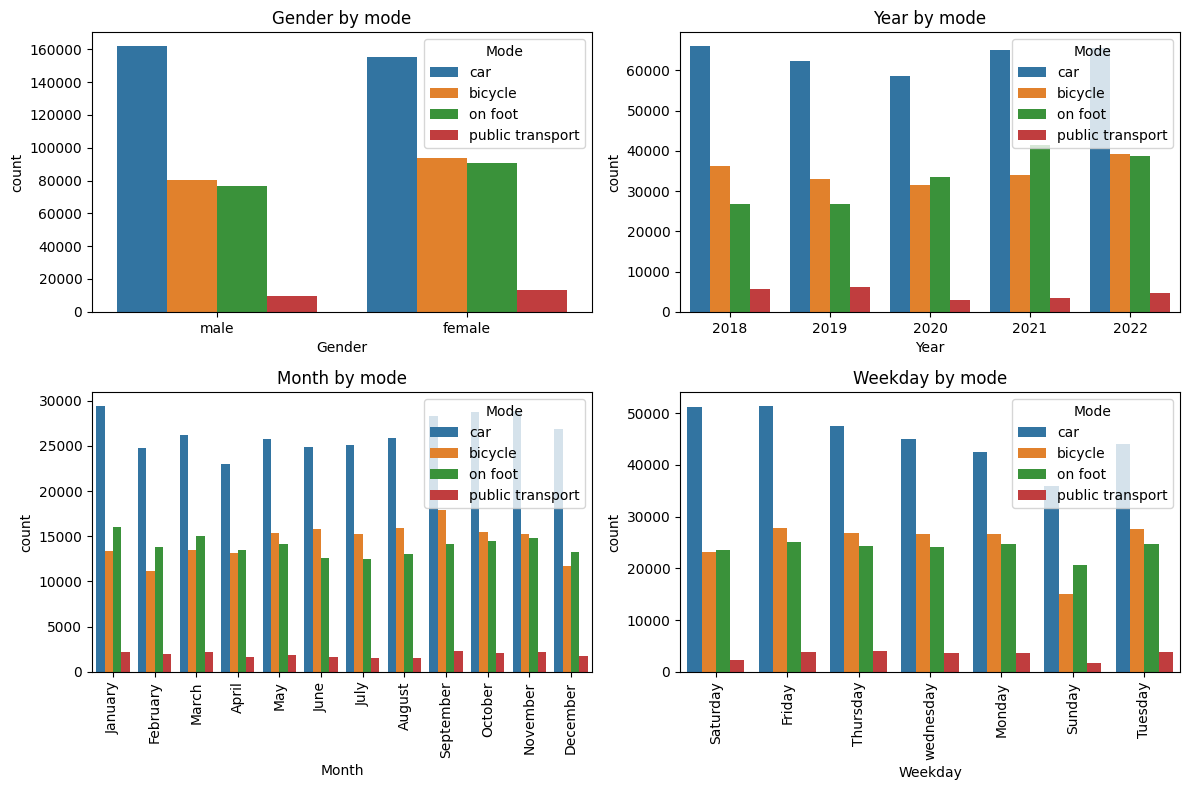

In [15]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Your countplot graphs
countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Year', data=df, hue="Mode", ax=axes[0, 1]), 'Year by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

# Rotate X-axis labels for the third and fourth countplots
for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

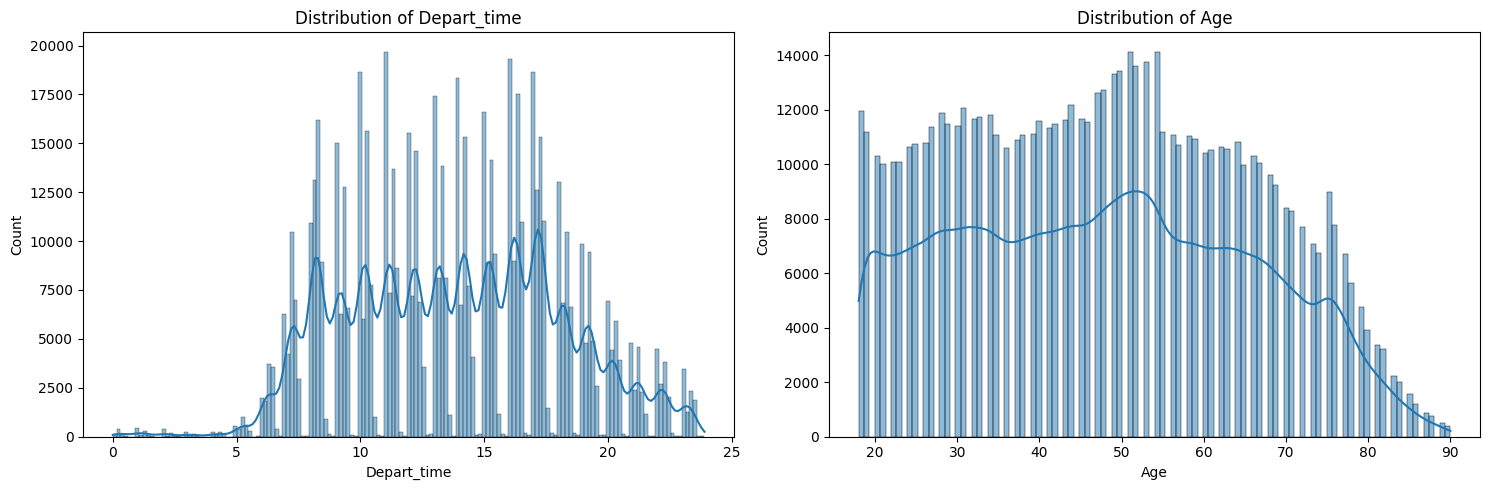

In [16]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='Depart_time', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Depart_time')

sns.histplot(data=df, x='Age', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Age')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

In [17]:
# Group the data by 'Mode' and compute mean, median, and standard deviation
grouped_stats = df.groupby('Mode').agg({
    'Duration': ['mean', 'median', 'std'],
    'Distance': ['mean', 'median', 'std'],
    'Age': ['mean', 'median', 'std'],
    'Depart_time': ['mean', 'median', 'std']
})

# Rename the columns for clarity
grouped_stats.columns = [f"{col}_{agg}" for col, agg in grouped_stats.columns]

# Reset the index to make 'Mode' a regular column
grouped_stats.reset_index(inplace=True)

# Display the mean, median, and standard deviation grouped by 'Mode'
print(grouped_stats)

               Mode  Duration_mean  Duration_median  Duration_std  \
0           bicycle      21.516105             10.0     36.999100   
1               car      24.535868             15.0     27.412117   
2           on foot      25.307749             15.0     33.615025   
3  public transport      22.332507             17.0     20.224636   

   Distance_mean  Distance_median  Distance_std   Age_mean  Age_median  \
0      69.376204             23.0    154.352378  47.689756        48.0   
1     188.619114             80.0    289.110853  48.733102        49.0   
2      73.323237             16.0    187.475937  47.798187        47.0   
3     280.155816            160.0    342.223988  36.954903        30.0   

     Age_std  Depart_time_mean  Depart_time_median  Depart_time_std  
0  18.035878         13.545589               13.40         4.222880  
1  16.725609         13.747481               14.00         4.254821  
2  18.335813         14.133207               14.10         4.304912  
3  

# DATA PREPROCESS

In [10]:
value_counts = df['Mode'].value_counts()
print(value_counts)

car                 309044
bicycle             165919
on foot             147569
public transport     22201
Name: Mode, dtype: int64


In [11]:
le=LabelEncoder()
features=["Mode","Month","Weekday","Gender","Elec_bike","FqEFiets","FqBTM","FqAutoB","Departure_prov","Arrival_prov","Motive"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [12]:
value_counts = df['Mode'].value_counts()
print(value_counts)

1    309044
0    165919
2    147569
3     22201
Name: Mode, dtype: int64


In [13]:
df

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration,Mode
0,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,10.30,15,1
1,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,11.15,10,1
2,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,15.55,5,0
3,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,18.30,5,0
4,2018,4,0,1,42,3,1,1,0,0,4,3,0,8,4,4,30,9.00,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649515,2022,2,4,0,49,7,1,1,0,0,4,3,2,1,7,7,110,15.56,35,1
649516,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,11,16.50,7,2
649517,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,6,17.15,5,2
649518,2022,2,4,0,49,7,1,1,0,0,4,3,2,9,7,7,63,18.20,15,1


<Axes: >

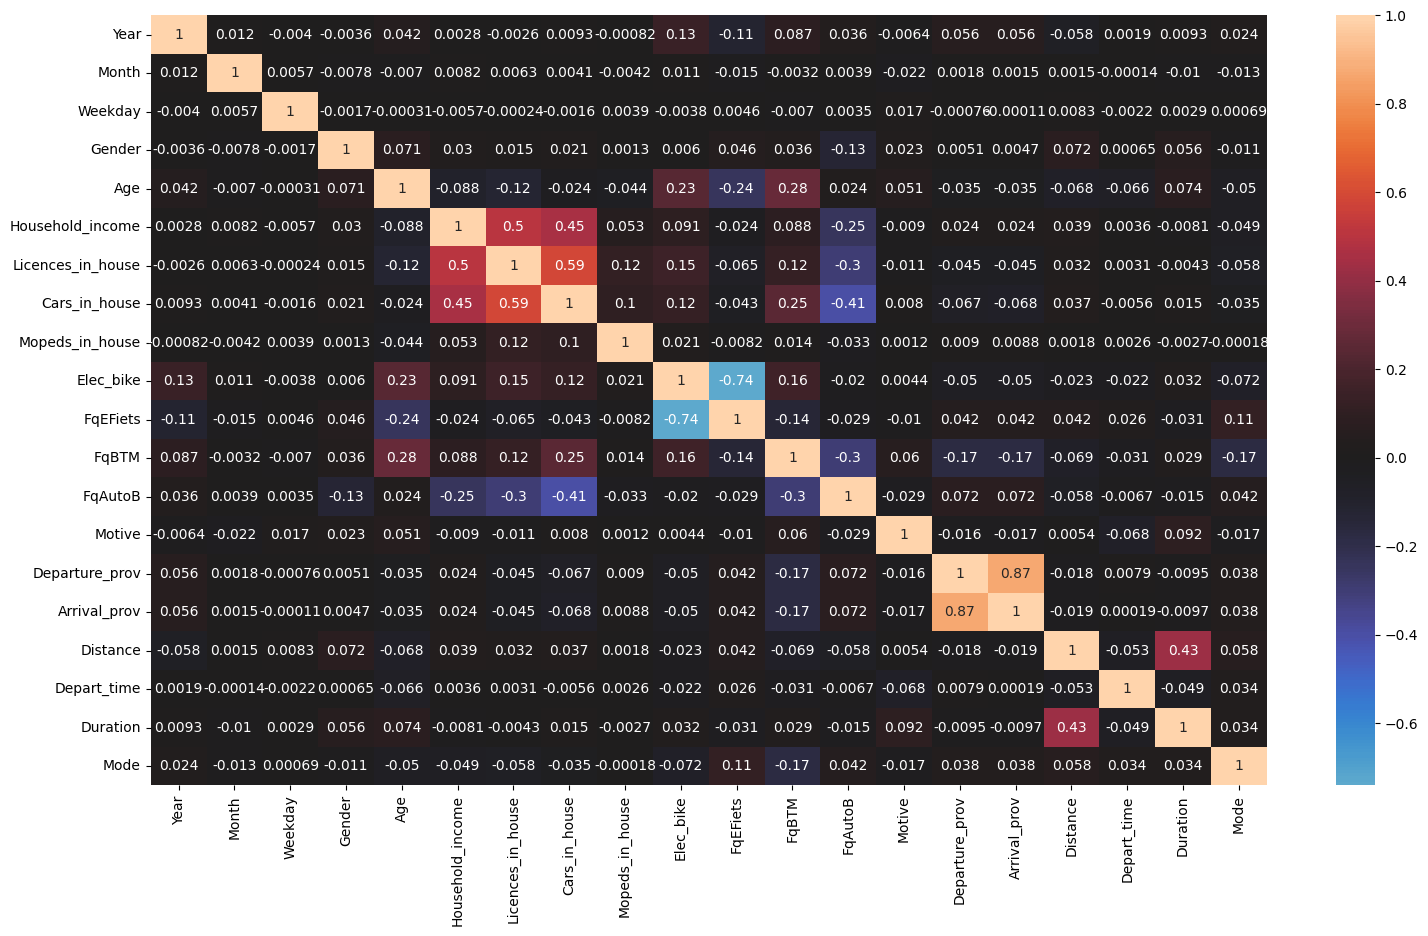

In [39]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [14]:
X = df.drop("Mode", axis=1)
y = df["Mode"]

In [15]:
X

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration
0,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,10.30,15
1,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,11.15,10
2,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,15.55,5
3,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,18.30,5
4,2018,4,0,1,42,3,1,1,0,0,4,3,0,8,4,4,30,9.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649515,2022,2,4,0,49,7,1,1,0,0,4,3,2,1,7,7,110,15.56,35
649516,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,11,16.50,7
649517,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,6,17.15,5
649518,2022,2,4,0,49,7,1,1,0,0,4,3,2,9,7,7,63,18.20,15


In [38]:
y

0         1
1         1
2         0
3         0
4         1
         ..
687578    1
687579    2
687580    2
687581    1
687582    1
Name: Mode, Length: 681704, dtype: int32

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

# KNN

In [53]:
# Create lists to store the results
k_values = list(range(3, 21))
scores = []

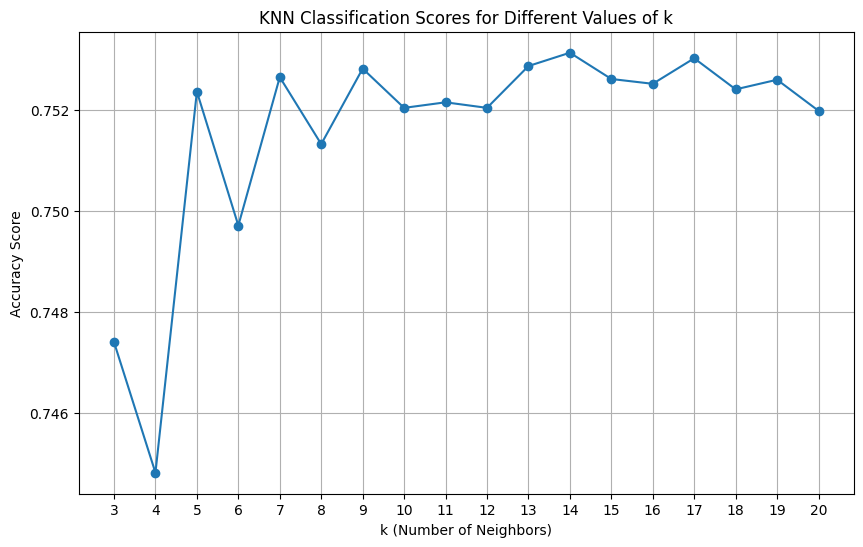

In [54]:
# Loop through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

# Create a graph based on the scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', linestyle='-')
plt.title('KNN Classification Scores for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [55]:
# Find the index of the maximum score
best_k_index = scores.index(max(scores))

# The best k is the corresponding value in the k_values list
best_k = k_values[best_k_index]

print("Best k:", best_k)
print("Best accuracy score:", max(scores))

Best k: 14
Best accuracy score: 0.753141021409554


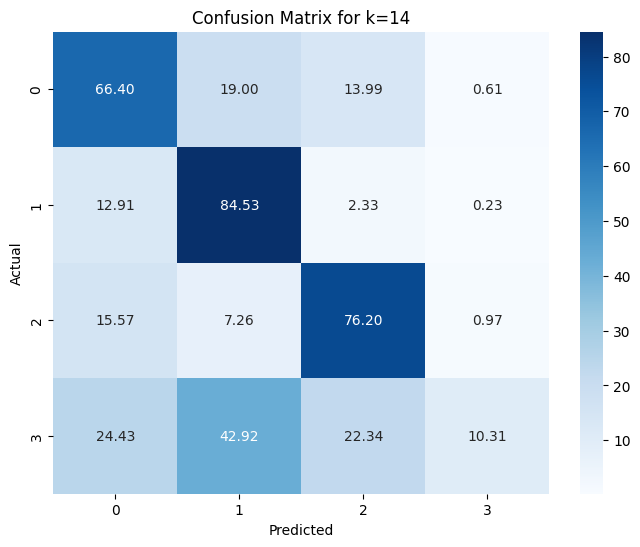

In [18]:
# Train the best model with the best k
best_knn = KNeighborsClassifier(n_neighbors=14)
best_knn.fit(X_train, y_train)

# Predict on the test data
y_pred = best_knn.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for k={14}')
plt.show()

In [57]:
KNN_Report = classification_report(y_test, y_pred)
print('KNN_Report:', KNN_Report, sep='\n')

KNN_Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.64     34629
           1       0.83      0.84      0.84     63659
           2       0.76      0.77      0.77     33489
           3       0.43      0.10      0.16      4564

    accuracy                           0.75    136341
   macro avg       0.66      0.59      0.60    136341
weighted avg       0.75      0.75      0.75    136341



# NBC

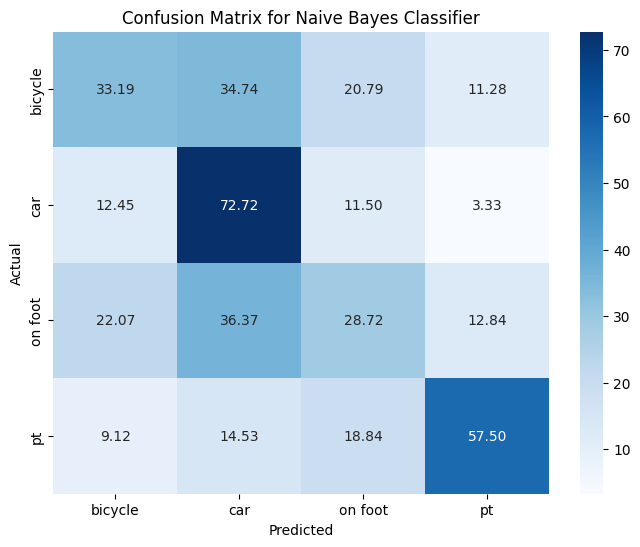

Accuracy Score: 0.5191978099529264
Confusion Matrix:


In [40]:
# Create and train a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Class labels
class_labels = ["bicycle", "car", "on foot", "pt"]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score:", accuracy)
print("Confusion Matrix:")

In [41]:
NBC_Report = classification_report(y_test, y_pred)
print('NBC_Report:', NBC_Report, sep='\n')

NBC_Report:
              precision    recall  f1-score   support

           0       0.43      0.33      0.37     33213
           1       0.66      0.73      0.69     61634
           2       0.36      0.29      0.32     29552
           3       0.21      0.57      0.31      4548

    accuracy                           0.52    128947
   macro avg       0.42      0.48      0.43    128947
weighted avg       0.52      0.52      0.51    128947



# Logistic Regression

C:\Users\melac\uoa_py_course\course_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


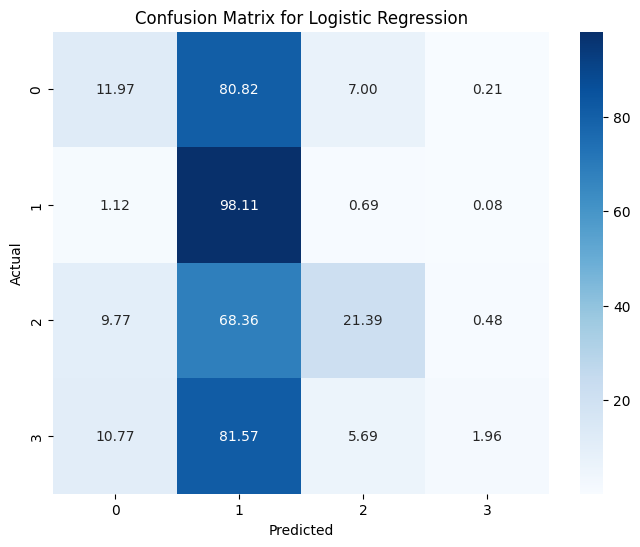

Accuracy Score: 0.5494660596989461


In [20]:
# Create and train a Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_regression.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Display the accuracy score
print("Accuracy Score:", accuracy)

In [21]:
Log_Report = classification_report(y_test, y_pred)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.49      0.12      0.19     33213
           1       0.54      0.98      0.70     61634
           2       0.68      0.21      0.33     29552
           3       0.25      0.02      0.04      4548

    accuracy                           0.55    128947
   macro avg       0.49      0.33      0.31    128947
weighted avg       0.55      0.55      0.46    128947



# Decision Tree

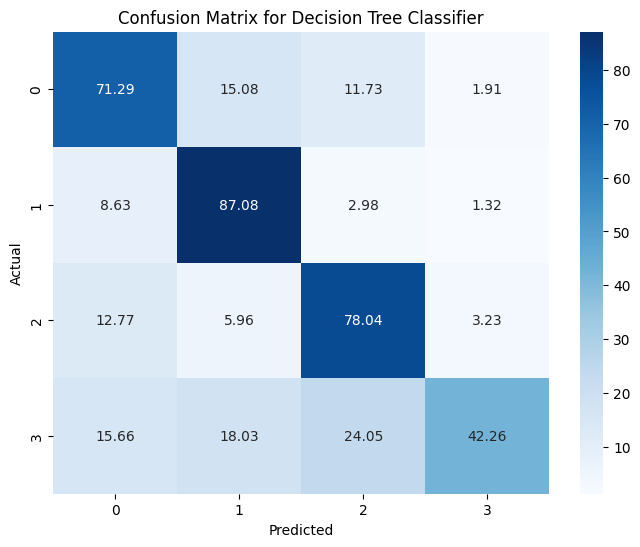

Accuracy Score: 0.793574104089277


In [22]:
# Create and train a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score:", accuracy)

In [23]:
Tree_Report = classification_report(y_test, y_pred)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     33213
           1       0.88      0.87      0.87     61634
           2       0.77      0.78      0.78     29552
           3       0.44      0.42      0.43      4548

    accuracy                           0.79    128947
   macro avg       0.70      0.70      0.70    128947
weighted avg       0.79      0.79      0.79    128947



# Pruned tree using cross validation

In [24]:
# Perform cross-validation to find the optimal tree size
optimal_tree_size = None
optimal_score = 0

for max_depth in range(1, 21): 
    pruned_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(pruned_tree, X_train, y_train, cv=10)  # 10-fold cross-validation
    mean_score = np.mean(scores)
    
    if mean_score > optimal_score:
        optimal_score = mean_score
        optimal_tree_size = max_depth

# Train the final pruned tree with the optimal tree size on the full training data
pruned_tree = DecisionTreeClassifier(max_depth=optimal_tree_size, random_state=42)
pruned_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = pruned_tree.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

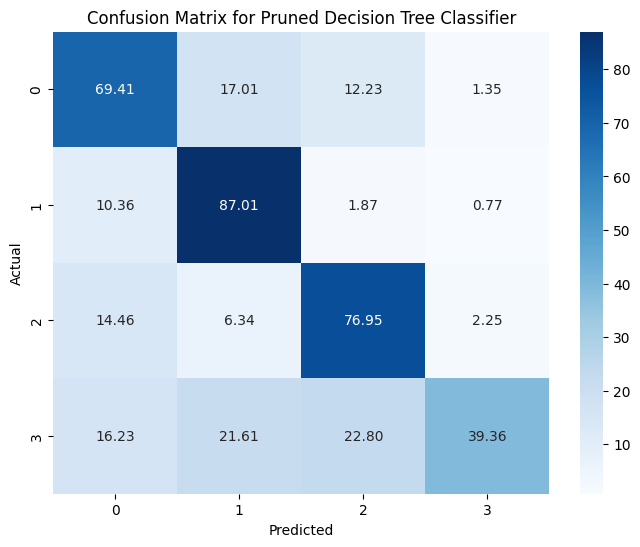

Optimal Tree Size (max_depth): 15
Accuracy Score: 0.7848728547387687


In [25]:
# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Pruned Decision Tree Classifier')
plt.show()

# Display the optimal tree size and accuracy score
print("Optimal Tree Size (max_depth):", optimal_tree_size)
print("Accuracy Score:", accuracy)

In [26]:
Pruned_Report = classification_report(y_test, y_pred)
print('Tree_Report:', Pruned_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     33213
           1       0.86      0.87      0.87     61634
           2       0.78      0.77      0.78     29552
           3       0.53      0.39      0.45      4548

    accuracy                           0.78    128947
   macro avg       0.71      0.68      0.69    128947
weighted avg       0.78      0.78      0.78    128947



# Bagging

In [27]:
# Create and train a Bagging Classifier with base Decision Tree models
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=200, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = bagging_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

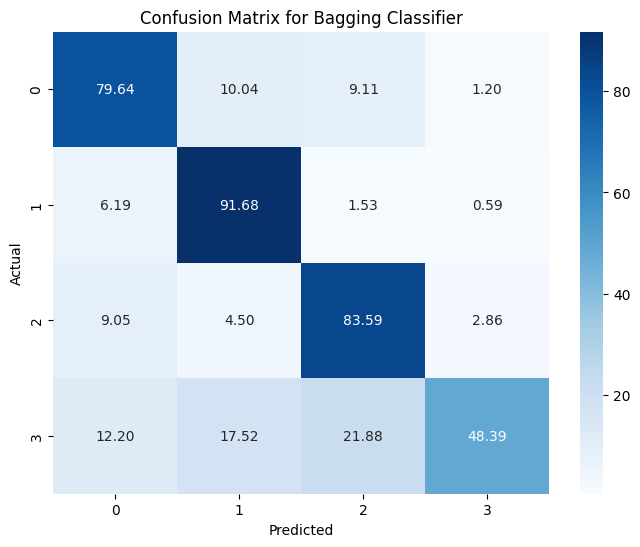

Accuracy Score: 0.85197794442678


In [28]:
# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score:", accuracy)

In [29]:
Bag_Report = classification_report(y_test, y_pred)
print('Bag_Report:', Bag_Report, sep='\n')

Bag_Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79     33213
           1       0.91      0.92      0.91     61634
           2       0.83      0.84      0.83     29552
           3       0.58      0.48      0.53      4548

    accuracy                           0.85    128947
   macro avg       0.78      0.76      0.77    128947
weighted avg       0.85      0.85      0.85    128947



# Random Forest

In [26]:
best_mtry = None
best_accuracy = 0

for mtry in range(2, 19): 
    # Create and train a Random Forest Classifier with the current mtry value
    random_forest = RandomForestClassifier(n_estimators=200, max_features=mtry, random_state=42)
    random_forest.fit(X_train, y_train)

    # Predict on the test data
    y_pred = random_forest.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this mtry value has the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mtry = mtry

# Display the best mtry value and its accuracy
print("Best mtry value:", best_mtry)
print("Best Accuracy Score:", best_accuracy)

Best mtry value: 3
Best Accuracy Score: 0.8627338804908281


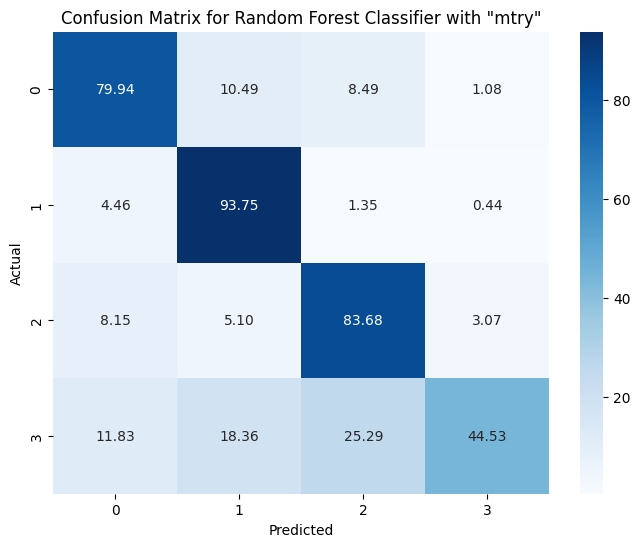

In [30]:
random_forest = RandomForestClassifier(n_estimators=200, max_features=3, random_state=123)
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier with "mtry"')
plt.show()

In [31]:
Rf_Report = classification_report(y_test, y_pred)
print('Rf_Report:', Rf_Report, sep='\n')

Rf_Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     33213
           1       0.91      0.94      0.92     61634
           2       0.84      0.84      0.84     29552
           3       0.57      0.45      0.50      4548

    accuracy                           0.86    128947
   macro avg       0.78      0.75      0.77    128947
weighted avg       0.86      0.86      0.86    128947



# Boosting

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 515786, number of used features: 19
[LightGBM] [Info] Start training from score -1.357556
[LightGBM] [Info] Start training from score -0.734645
[LightGBM] [Info] Start training from score -1.474863
[LightGBM] [Info] Start training from score -3.374786


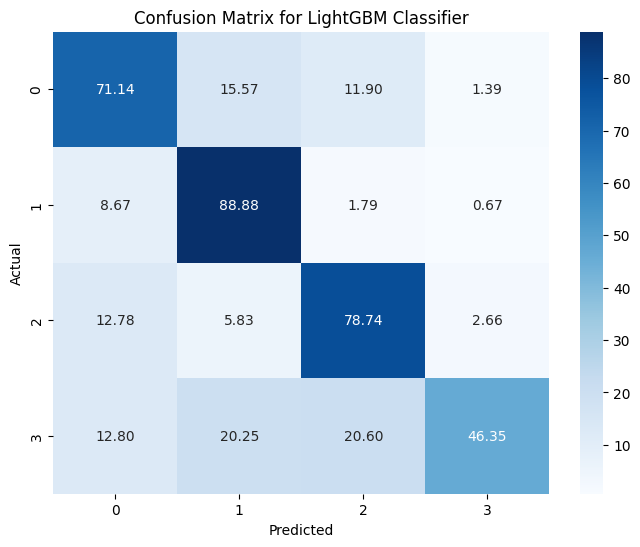

Accuracy Score (LightGBM): 0.8048422995494273


In [32]:
# Create and train a LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=200, random_state=42)
lgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = lgb_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LightGBM Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score (LightGBM):", accuracy)

In [33]:
Boost1_Report = classification_report(y_test, y_pred)
print('Boost1_Report:', Boost1_Report, sep='\n')

Boost1_Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     33213
           1       0.88      0.89      0.88     61634
           2       0.80      0.79      0.79     29552
           3       0.56      0.46      0.51      4548

    accuracy                           0.80    128947
   macro avg       0.73      0.71      0.72    128947
weighted avg       0.80      0.80      0.80    128947



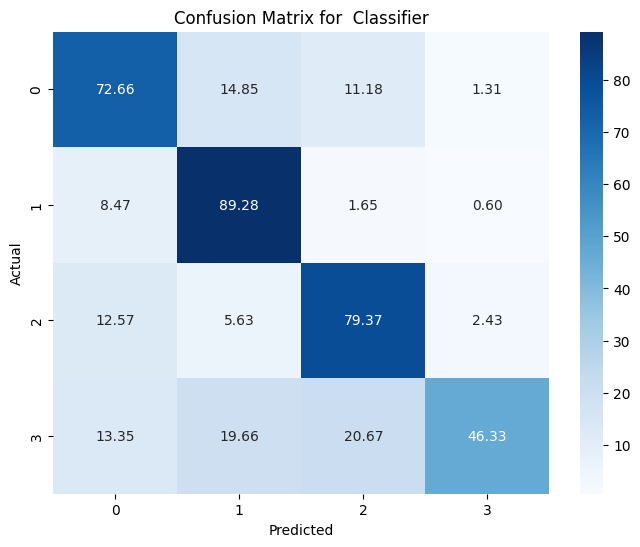

Accuracy Score (XGBoost): 0.8121476265442391


In [34]:
# Create and train an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for  Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score (XGBoost):", accuracy)

# OVERSAMPLING 

In [91]:
X = df.drop("Mode", axis=1)
y = df["Mode"]

In [92]:
X

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration
0,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,10.30,15
1,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,11.15,10
2,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,15.55,5
3,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,18.30,5
4,2018,4,0,1,42,3,1,1,0,0,4,3,0,8,4,4,30,9.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687578,2022,2,4,0,49,7,1,1,0,0,4,3,2,1,7,7,110,15.56,35
687579,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,11,16.50,7
687580,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,6,17.15,5
687581,2022,2,4,0,49,7,1,1,0,0,4,3,2,9,7,7,63,18.20,15


In [93]:
y

0         1
1         1
2         0
3         0
4         1
         ..
687578    1
687579    2
687580    2
687581    1
687582    1
Name: Mode, Length: 681704, dtype: int32

In [94]:
class_2_count = np.sum(y == 2)
class_3_count = np.sum(y == 3)
oversample_count = class_2_count - class_3_count

# Create a RandomOverSampler with a specific sampling strategy for class 3
oversampler = RandomOverSampler(sampling_strategy={2: class_2_count, 3: class_3_count + oversample_count}, random_state=42)

# Fit and resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [95]:
print(Counter(y_resampled))

Counter({1: 317683, 0: 173802, 2: 167224, 3: 167224})


In [96]:
X_resampled

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration
0,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,10.30,15
1,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,11.15,10
2,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,15.55,5
3,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,18.30,5
4,2018,4,0,1,42,3,1,1,0,0,4,3,0,8,4,4,30,9.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825928,2020,5,6,1,60,10,4,2,0,0,4,1,3,12,9,7,864,16.20,30
825929,2019,2,2,1,54,5,0,0,0,0,4,2,4,8,9,9,62,15.40,20
825930,2021,3,1,0,59,2,3,1,0,0,4,0,4,12,7,7,63,6.00,45
825931,2019,4,6,1,21,8,1,0,0,0,4,0,3,1,9,9,64,18.30,11


In [97]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state =123)

In [98]:
y_test_resampled

373297    1
456419    0
811333    3
725345    3
496958    0
         ..
582611    1
140825    0
583326    1
713791    3
464394    2
Name: Mode, Length: 165187, dtype: int32

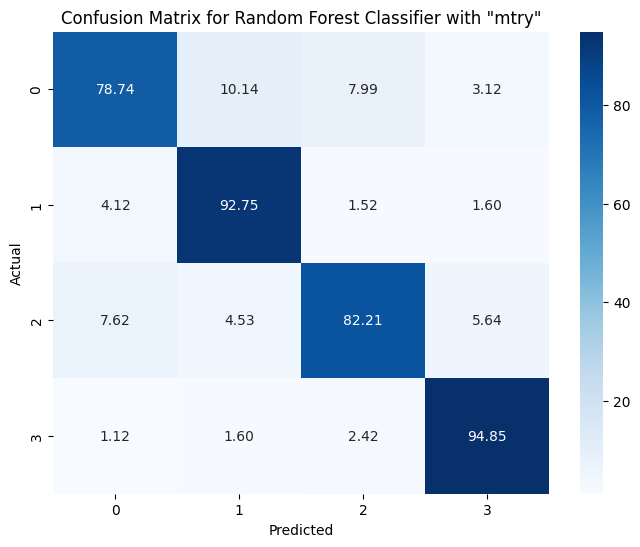

In [80]:
random_forest = RandomForestClassifier(n_estimators=200, max_features=3, random_state=123)
random_forest.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_resampled = random_forest.predict(X_test_resampled)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred_resampled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test_resampled, y_pred_resampled)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier with "mtry"')
plt.show()

In [84]:
Rf_ovrs_Report = classification_report(y_test_resampled, y_pred_resampled)
print('Report:', Rf_ovrs_Report, sep='\n')

Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     34946
           1       0.91      0.93      0.92     63271
           2       0.86      0.82      0.84     33483
           3       0.89      0.95      0.92     33487

    accuracy                           0.88    165187
   macro avg       0.87      0.87      0.87    165187
weighted avg       0.88      0.88      0.88    165187



In [99]:
X_resampled.describe()

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration
count,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000,825933.000000
mean,2020.013529,5.692531,2.994777,0.473059,45.931876,6.689742,1.772515,1.263943,0.045775,0.280281,3.316735,2.606307,1.647577,7.893473,6.918263,6.917068,158.721383,13.692106,23.616711
std,1.445072,3.460704,2.062271,0.499274,18.187628,2.747052,0.922689,0.930999,0.266861,0.449137,1.278072,1.406963,1.448274,3.627572,2.660382,2.656470,272.624681,4.305983,29.878717
min,2018.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,1.000000,0.000000,30.000000,5.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,5.000000,6.000000,6.000000,20.000000,10.150000,10.000000
50%,2020.000000,6.000000,3.000000,0.000000,45.000000,7.000000,2.000000,1.000000,0.000000,0.000000,4.000000,3.000000,2.000000,8.000000,7.000000,7.000000,50.000000,14.000000,15.000000
75%,2021.000000,9.000000,5.000000,1.000000,60.000000,9.000000,2.000000,2.000000,0.000000,1.000000,4.000000,4.000000,2.000000,11.000000,9.000000,9.000000,176.000000,17.000000,30.000000
max,2022.000000,11.000000,6.000000,1.000000,90.000000,10.000000,9.000000,9.000000,9.000000,1.000000,4.000000,4.000000,4.000000,12.000000,12.000000,12.000000,6600.000000,23.900000,960.000000


# EXPERIMENTING WITH 3 CLASS LABELS

In [42]:
df

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration,Mode
0,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,10.30,15,1
1,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,11.15,10,1
2,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,15.55,5,0
3,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,18.30,5,0
4,2018,4,0,1,42,3,1,1,0,0,4,3,0,8,4,4,30,9.00,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649515,2022,2,4,0,49,7,1,1,0,0,4,3,2,1,7,7,110,15.56,35,1
649516,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,11,16.50,7,2
649517,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,6,17.15,5,2
649518,2022,2,4,0,49,7,1,1,0,0,4,3,2,9,7,7,63,18.20,15,1


In [43]:
value_counts = df['Mode'].value_counts()
print(value_counts)

1    309044
0    165919
2    147569
3     22201
Name: Mode, dtype: int64


In [46]:
value_mapping = {0: "sustainable mode(bike/pt)", 1: "car", 2: "on foot", 3: "sustainable mode(bike/pt)"}
df['Mode'] = df['Mode'].replace(value_mapping)

In [47]:
value_counts = df['Mode'].value_counts()
print(value_counts)

car                 309044
sustainable mode    188120
on foot             147569
Name: Mode, dtype: int64


In [48]:
le=LabelEncoder()
features=["Mode"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [50]:
value_counts = df['Mode'].value_counts()
print(value_counts)

0    309044
2    188120
1    147569
Name: Mode, dtype: int64


In [51]:
X = df.drop("Mode", axis=1)
y = df["Mode"]

In [52]:
X

,Year,Month,Weekday,Gender,Age,Household_income,Licences_in_house,Cars_in_house,Mopeds_in_house,Elec_bike,FqEFiets,FqBTM,FqAutoB,Motive,Departure_prov,Arrival_prov,Distance,Depart_time,Duration
0,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,10.30,15
1,2018,4,2,1,42,8,1,1,0,0,4,4,0,8,4,4,60,11.15,10
2,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,15.55,5
3,2018,4,2,1,42,8,1,1,0,0,4,4,0,11,4,4,10,18.30,5
4,2018,4,0,1,42,3,1,1,0,0,4,3,0,8,4,4,30,9.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649515,2022,2,4,0,49,7,1,1,0,0,4,3,2,1,7,7,110,15.56,35
649516,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,11,16.50,7
649517,2022,2,4,0,49,7,1,1,0,0,4,3,2,8,7,7,6,17.15,5
649518,2022,2,4,0,49,7,1,1,0,0,4,3,2,9,7,7,63,18.20,15


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

# NBC

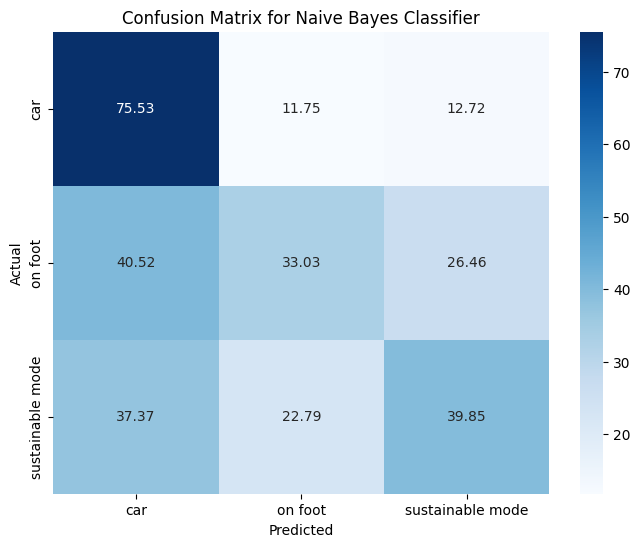

Accuracy Score: 0.5534056627916896


In [64]:
# Create and train a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Class labels
class_labels = ["car", "on foot", "sustainable mode"]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score:", accuracy)

In [65]:
NBC_Report = classification_report(y_test, y_pred)
print('NBC_Report:', NBC_Report, sep='\n')

NBC_Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.69     61634
           1       0.38      0.33      0.35     29552
           2       0.49      0.40      0.44     37761

    accuracy                           0.55    128947
   macro avg       0.50      0.49      0.50    128947
weighted avg       0.54      0.55      0.54    128947



# Logistic Regression

C:\Users\melac\uoa_py_course\course_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


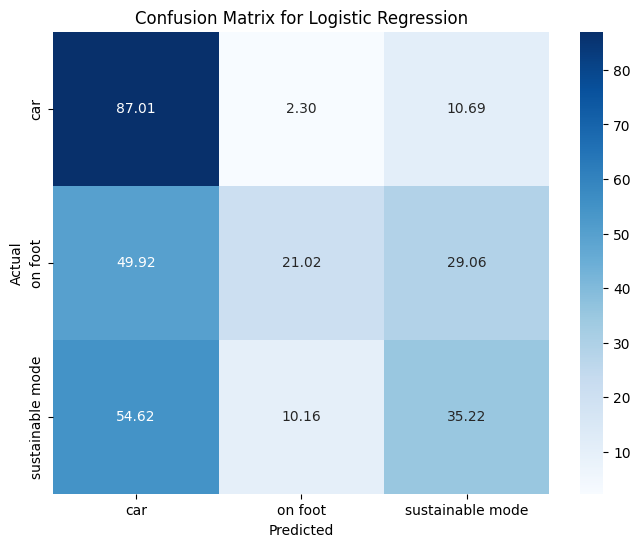

Accuracy Score: 0.5672175389888869


In [66]:
# Create and train a Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_regression.predict(X_test)

# Class labels
class_labels = ["car", "on foot", "sustainable mode"]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Display the accuracy score
print("Accuracy Score:", accuracy)

In [67]:
Log_Report = classification_report(y_test, y_pred)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.60      0.87      0.71     61634
           1       0.54      0.21      0.30     29552
           2       0.47      0.35      0.40     37761

    accuracy                           0.57    128947
   macro avg       0.54      0.48      0.47    128947
weighted avg       0.55      0.57      0.53    128947



# Decision Tree

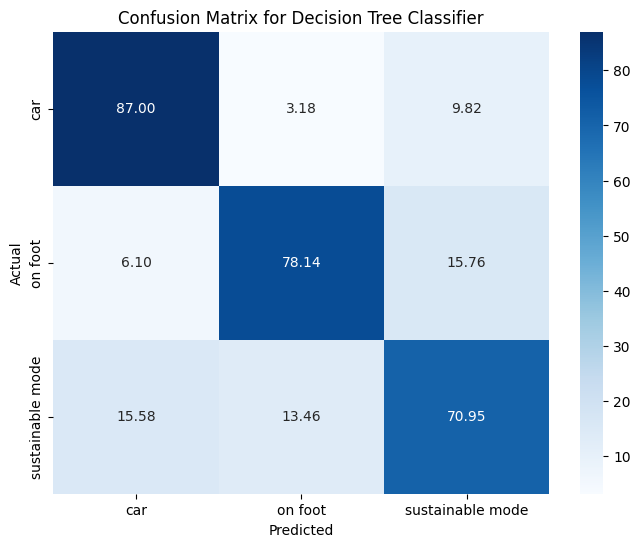

Accuracy Score: 0.802686375022296


In [68]:
# Create and train a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Class labels
class_labels = ["car", "on foot", "sustainable mode"]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score:", accuracy)

In [69]:
Tree_Report = classification_report(y_test, y_pred)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     61634
           1       0.77      0.78      0.77     29552
           2       0.71      0.71      0.71     37761

    accuracy                           0.80    128947
   macro avg       0.79      0.79      0.79    128947
weighted avg       0.80      0.80      0.80    128947



# Random Forest

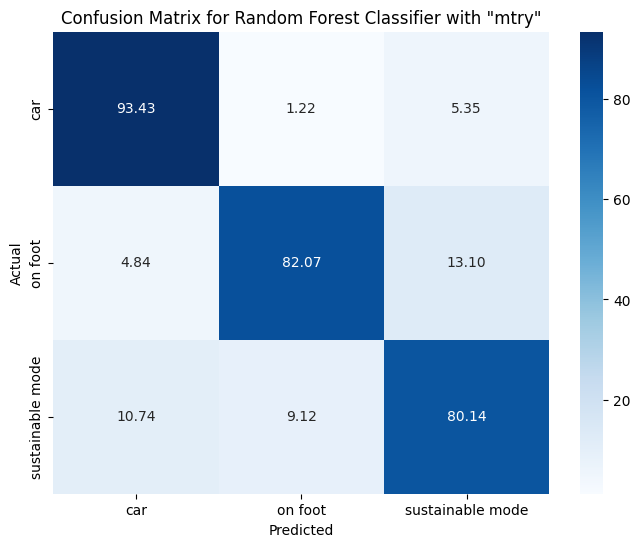

In [70]:
random_forest = RandomForestClassifier(n_estimators=200, max_features=3, random_state=123)
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest.predict(X_test)

# Class labels
class_labels = ["car", "on foot", "sustainable mode"]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier with "mtry"')
plt.show()

In [71]:
Rf_Report = classification_report(y_test, y_pred)
print('Rf_Report:', Rf_Report, sep='\n')

Rf_Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     61634
           1       0.85      0.82      0.84     29552
           2       0.81      0.80      0.80     37761

    accuracy                           0.87    128947
   macro avg       0.86      0.85      0.85    128947
weighted avg       0.87      0.87      0.87    128947



# Boosting

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 515786, number of used features: 19
[LightGBM] [Info] Start training from score -0.734645
[LightGBM] [Info] Start training from score -1.474863
[LightGBM] [Info] Start training from score -1.232666


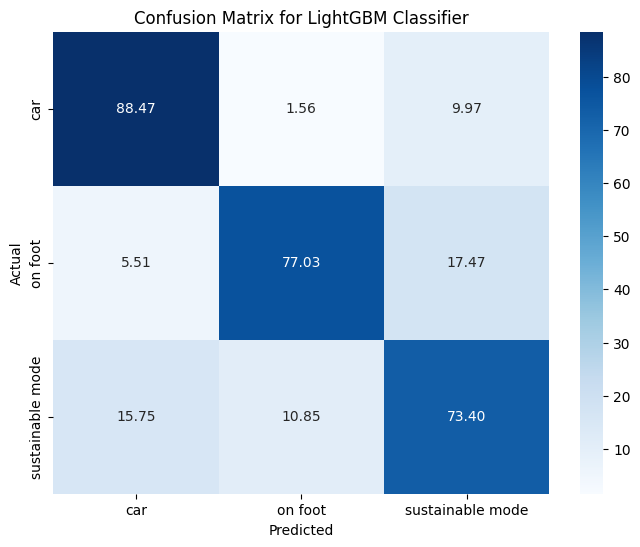

Accuracy Score (LightGBM): 0.8143500818165603


In [72]:
# Create and train a LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=200, random_state=42)
lgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = lgb_classifier.predict(X_test)

# Class labels
class_labels = ["car", "on foot", "sustainable mode"]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LightGBM Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score (LightGBM):", accuracy)

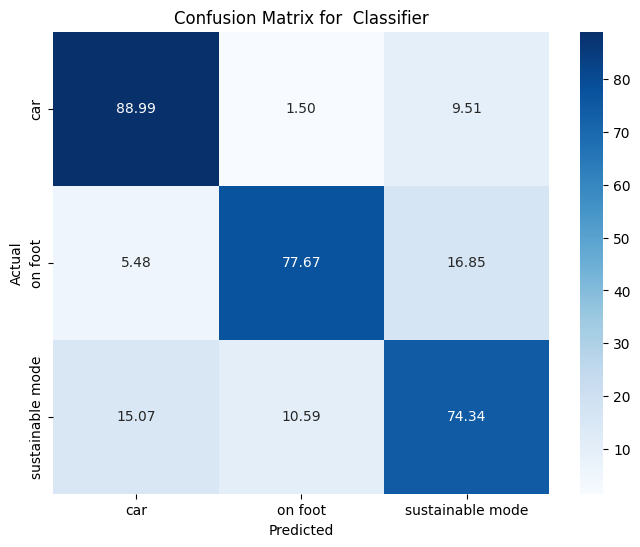

Accuracy Score (XGBoost): 0.8210582642481019


In [73]:
# Create and train an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

class_labels = ["car", "on foot", "sustainable mode"]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the accuracy for each class
class_accuracies = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Replace the values in the confusion matrix with accuracies
conf_matrix_percentages = (conf_matrix.T / conf_matrix.sum(axis=1)).T * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for  Classifier')
plt.show()

# Display the accuracy score
print("Accuracy Score (XGBoost):", accuracy)

In [74]:
Boost2_Report = classification_report(y_test, y_pred)
print('Boost2_Report:', Boost2_Report, sep='\n')

Boost2_Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     61634
           1       0.82      0.78      0.80     29552
           2       0.72      0.74      0.73     37761

    accuracy                           0.82    128947
   macro avg       0.81      0.80      0.81    128947
weighted avg       0.82      0.82      0.82    128947

